In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random as rd
import os

In [193]:
df = pd.read_csv('/home/josh/Documents/dsi/caps/cap1/data/epl_cleaned.csv')
df = df.iloc[:,1:]

In [194]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000
mean,1.529194,1.139498,0.681638,0.498679,13.532232,10.560106,6.265786,4.831572,6.132629,4.786790,11.438309,12.004888,1.402906,1.761691,0.063937,0.091810
std,1.295951,1.131626,0.830673,0.715095,5.227328,4.519729,3.350870,2.815887,3.100229,2.727843,3.807942,3.966547,1.188482,1.272393,0.255745,0.300436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000


In [195]:
working_df = df.copy()
working_df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,ref_name
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,17.0,...,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0,Rob Harris
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,17.0,...,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0,Graham Barber
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,6.0,...,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0,Barry Knight
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,6.0,...,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0,Andy D'Urso
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,17.0,...,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0,Dermot Gallagher


In [196]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7586 entries, 0 to 7585
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      7570 non-null   object 
 1   HomeTeam  7570 non-null   object 
 2   AwayTeam  7570 non-null   object 
 3   FTHG      7570 non-null   float64
 4   FTAG      7570 non-null   float64
 5   FTR       7570 non-null   object 
 6   HTHG      7570 non-null   float64
 7   HTAG      7570 non-null   float64
 8   HTR       7570 non-null   object 
 9   HS        7570 non-null   float64
 10  AS        7570 non-null   float64
 11  HST       7570 non-null   float64
 12  AST       7570 non-null   float64
 13  HC        7570 non-null   float64
 14  AC        7570 non-null   float64
 15  HF        7570 non-null   float64
 16  AF        7570 non-null   float64
 17  HY        7570 non-null   float64
 18  AY        7570 non-null   float64
 19  HR        7570 non-null   float64
 20  AR        7570 non-null   floa

In [197]:
working_df.Date

0       2000-08-19
1       2000-08-19
2       2000-08-19
3       2000-08-19
4       2000-08-19
           ...    
7581           NaN
7582           NaN
7583           NaN
7584           NaN
7585           NaN
Name: Date, Length: 7586, dtype: object

In [198]:
working_df.Date = pd.to_datetime(working_df.Date)
working_df.Date

0      2000-08-19
1      2000-08-19
2      2000-08-19
3      2000-08-19
4      2000-08-19
          ...    
7581          NaT
7582          NaT
7583          NaT
7584          NaT
7585          NaT
Name: Date, Length: 7586, dtype: datetime64[ns]

In [199]:
working_df[working_df.Date.dt.year == 2011]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,ref_name
3990,2011-01-01,Birmingham,Arsenal,0.0,3.0,A,0.0,1.0,A,2.0,...,11.0,4.0,5.0,7.0,9.0,3.0,1.0,0.0,0.0,Peter Walton
3991,2011-01-01,Liverpool,Bolton,2.0,1.0,H,0.0,1.0,A,16.0,...,4.0,7.0,4.0,11.0,16.0,2.0,2.0,0.0,0.0,Kevin Friend
3992,2011-01-01,Man City,Blackpool,1.0,0.0,H,1.0,0.0,H,15.0,...,6.0,10.0,4.0,11.0,9.0,0.0,0.0,0.0,0.0,Mark Clattenburg
3993,2011-01-01,Stoke,Everton,2.0,0.0,H,1.0,0.0,H,7.0,...,10.0,1.0,5.0,14.0,8.0,4.0,1.0,0.0,0.0,Andre Marriner
3994,2011-01-01,Sunderland,Blackburn,3.0,0.0,H,2.0,0.0,H,13.0,...,3.0,3.0,2.0,13.0,9.0,1.0,2.0,0.0,0.0,Mike Dean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4362,2011-12-31,Chelsea,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,...,9.0,9.0,2.0,7.0,13.0,1.0,1.0,0.0,0.0,Mark Halsey
4363,2011-12-31,Man United,Blackburn,2.0,3.0,A,0.0,1.0,A,26.0,...,5.0,17.0,3.0,8.0,10.0,2.0,2.0,0.0,0.0,Mike Dean
4364,2011-12-31,Norwich,Fulham,1.0,1.0,D,0.0,1.0,A,18.0,...,6.0,4.0,3.0,9.0,6.0,0.0,0.0,0.0,0.0,Howard Webb
4365,2011-12-31,Stoke,Wigan,2.0,2.0,D,0.0,1.0,A,12.0,...,6.0,8.0,5.0,14.0,5.0,2.0,3.0,0.0,1.0,Michael Oliver


In [200]:
def yearlyDf(df,yr):
    for x in yr:
        new_df = df[df.Date.dt.year == x]
        new_df= new_df.to_csv(f'/home/josh/Documents/dsi/caps/cap1/data/{x}/df_{x}.csv')

In [201]:
yearlyDf(working_df,range(2000,2021))

In [202]:
def create_df(inputfile):
    n = pd.read_csv(inputfile)
    return n.iloc[:,1:]

In [204]:
df2000 = create_df('./2000/df_2000.csv')
df2000.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,ref_name
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,17.0,...,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0,Rob Harris
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,17.0,...,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0,Graham Barber
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,6.0,...,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0,Barry Knight
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,6.0,...,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0,Andy D'Urso
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,17.0,...,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0,Dermot Gallagher


In [245]:
def create_ref_df(df):
    ref_df = df.groupby('ref_name').sum()
    ref_df['Games_reffed'] = df.ref_name.value_counts()
    ref_df.reset_index(inplace=True)
    return ref_df

In [247]:
refs2000 = create_ref_df(df2000)
refs2000.head()

,ref_name,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Games_reffed
0,Alan Wiley,12.0,14.0,7.0,8.0,139.0,126.0,56.0,61.0,66.0,53.0,139.0,144.0,14.0,15.0,0.0,0.0,11
1,Andy D'Urso,17.0,11.0,5.0,8.0,131.0,95.0,58.0,52.0,62.0,63.0,122.0,139.0,16.0,18.0,2.0,0.0,11
2,Andy Hall,3.0,0.0,0.0,0.0,13.0,8.0,8.0,4.0,3.0,5.0,17.0,15.0,2.0,1.0,0.0,1.0,1
3,Barry Knight,19.0,8.0,7.0,5.0,108.0,99.0,63.0,46.0,57.0,44.0,118.0,128.0,12.0,17.0,2.0,0.0,9
4,Clive Wilkes,2.0,5.0,0.0,2.0,23.0,22.0,6.0,12.0,16.0,11.0,21.0,21.0,2.0,4.0,0.0,0.0,2


In [210]:
tot_teams2000 = df2000.HomeTeam.unique()
tot_teams2000

array(['Charlton', 'Chelsea', 'Coventry', 'Derby', 'Leeds', 'Leicester',
       'Liverpool', 'Sunderland', 'Tottenham', 'Man United', 'Arsenal',
       'Bradford', 'Ipswich', 'Middlesbrough', 'Everton', 'Man City',
       'Newcastle', 'Southampton', 'West Ham', 'Aston Villa'],
      dtype=object)

In [211]:
df2000.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY',
       'HR', 'AR', 'ref_name'],
      dtype='object')

In [223]:
refs2000_list = df2000.ref_name.unique()

In [81]:
# def ReftoCsv(df,refs,year):
#      for name in refs:
#         new_df = df[df.Referee == name]
#         new_df= new_df.to_csv(f'/home/josh/Documents/dsi/caps/cap1/data/{year}/df_{str(name)}.csv')

In [82]:
# toCsv(df2000,refs2000,2000)

In [19]:
# def RefCsv_to_df(path):
#     return {str(file):pd.read_csv(path+'/'+file) for file in os.listdir(path)}

In [20]:
# refs_dict_2000 = RefCsv_to_df('/home/josh/Documents/dsi/caps/cap1/data/2000')
# refs_dict_2000

{'df_RobHarris.csv':    Unnamed: 0  Unnamed: 0.1        Date   HomeTeam     AwayTeam  FTHG  FTAG  \
 0           0             0  2000-08-19   Charlton     Man City     4     0   
 1          79            79  2000-10-14    Arsenal  Aston Villa     1     0   
 2         121           121  2000-11-11   Bradford      Everton     0     1   
 3         146           146  2000-11-25  Tottenham    Leicester     3     0   
 4         182           182  2000-12-23      Derby    Newcastle     2     0   
 
   FTR  HTHG  HTAG  ... HST AST  HC  AC  HF  AF  HY  AY  HR  AR  
 0   H     2     0  ...  14   4   6   6  13  12   1   2   0   0  
 1   H     0     0  ...  10   3   7   4  12  20   1   4   0   1  
 2   A     0     0  ...   6   4   3   3   8  18   1   2   0   0  
 3   H     2     0  ...   7   5   5   8  21  15   1   3   0   1  
 4   H     1     0  ...   5   4   2   3  17  16   1   2   0   0  
 
 [5 rows x 24 columns],
 'df_DermotGallagher.csv':     Unnamed: 0  Unnamed: 0.1        Date       Ho

In [171]:
# df_RobHarris2000 = refs_dict['df_RobHarris.csv'].iloc[:,2:]
# df_RobHarris2000.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-08-19,Charlton,Man City,4,0,H,2,0,H,Rob Harris,...,14,4,6,6,13,12,1,2,0,0
1,2000-10-14,Arsenal,Aston Villa,1,0,H,0,0,D,Rob Harris,...,10,3,7,4,12,20,1,4,0,1
2,2000-11-11,Bradford,Everton,0,1,A,0,0,D,Rob Harris,...,6,4,3,3,8,18,1,2,0,0
3,2000-11-25,Tottenham,Leicester,3,0,H,2,0,H,Rob Harris,...,7,5,5,8,21,15,1,3,0,1
4,2000-12-23,Derby,Newcastle,2,0,H,1,0,H,Rob Harris,...,5,4,2,3,17,16,1,2,0,0


In [213]:
working_df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000
mean,1.529194,1.139498,0.681638,0.498679,13.532232,10.560106,6.265786,4.831572,6.132629,4.786790,11.438309,12.004888,1.402906,1.761691,0.063937,0.091810
std,1.295951,1.131626,0.830673,0.715095,5.227328,4.519729,3.350870,2.815887,3.100229,2.727843,3.807942,3.966547,1.188482,1.272393,0.255745,0.300436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000


In [215]:
totyrs_totyell = working_df.HY.sum() + working_df.AY.sum()
totyrs_totyell

23956.0

In [217]:
totyrs_totred = working_df.HR.sum() + working_df.AR.sum()
totyrs_totred

1179.0

In [218]:
totyrs_totgames = len(working_df.Date)
totyrs_totgames

7586

In [219]:
totyrs_yell_per_game = totyrs_totyell / totyrs_totgames
totyrs_yell_per_game 

3.157922488795149

In [221]:
totyrs_red_per_game = totyrs_totred / totyrs_totgames
totyrs_red_per_game 

0.15541787503295545

In [21]:
# def card_totaler(dic):
#         cards = []
#         for k,v in dic.items():
#             df = dic[k]
#             tot_home_yellow = df['HY'].sum()
#             tot_away_yellow = df['AY'].sum()
#             tot_yellow = tot_home_yellow + tot_away_yellow
#             tot_home_red = df['HR'].sum()
#             tot_away_red = df['AR'].sum()
#             tot_red = tot_home_red + tot_away_red
#             cards.append([k,tot_home_yellow,tot_away_yellow,tot_yellow,tot_home_red,tot_away_red,tot_red])
#         return cards
            

In [22]:
# card_totaler(refs_dict_2000)

[['df_RobHarris.csv', 5, 13, 18, 0, 2, 2],
 ['df_DermotGallagher.csv', 16, 20, 36, 2, 0, 2],
 ['df_RoyBurton.csv', 1, 4, 5, 0, 1, 1],
 ['df_IanHarris.csv', 0, 1, 1, 0, 0, 0],
 ['df_AlanWiley.csv', 14, 15, 29, 0, 0, 0],
 ['df_SteveBennett.csv', 7, 13, 20, 0, 1, 1],
 ['df_JeffWinter.csv', 10, 17, 27, 1, 1, 2],
 ['df_RobStyles.csv', 15, 27, 42, 1, 2, 3],
 ['df_MattMessias.csv', 1, 3, 4, 0, 0, 0],
 ['df_PeterJones.csv', 10, 16, 26, 1, 0, 1],
 ['df_GrahamBarber.csv', 12, 17, 29, 0, 0, 0],
 ['df_NealeBarry.csv', 5, 16, 21, 0, 1, 1],
 ['df_MarkHalsey.csv', 12, 19, 31, 1, 0, 1],
 ['df_BarryKnight.csv', 12, 17, 29, 2, 0, 2],
 ['df_PaulDurkin.csv', 14, 15, 29, 1, 1, 2],
 ['df_SteveDunn.csv', 16, 15, 31, 0, 1, 1],
 ['df_GrahamPoll.csv', 18, 29, 47, 1, 2, 3],
 ['df_2000.csv', 258, 369, 627, 14, 14, 28],
 ['df_CliveWilkes.csv', 2, 4, 6, 0, 0, 0],
 ['df_MikeRiley.csv', 24, 22, 46, 1, 0, 1],
 ['df_FTaylor.csv', 5, 3, 8, 0, 0, 0],
 ["df_AndyD'Urso.csv", 16, 18, 34, 2, 0, 2],
 ['df_MikeDean.csv', 9, 15

In [246]:
totrefs = create_ref_df(working_df)
totrefs.head()

,ref_name,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Games_reffed
0,Alan Wiley,370.0,296.0,162.0,133.0,3264.0,2561.0,1664.0,1315.0,1499.0,1183.0,3277.0,3358.0,351.0,417.0,11.0,21.0,253
1,Andre Marriner,525.0,428.0,241.0,197.0,4635.0,3710.0,2034.0,1642.0,1978.0,1599.0,3477.0,3539.0,468.0,584.0,20.0,36.0,332
2,Andy D'Urso,151.0,109.0,64.0,50.0,1333.0,930.0,659.0,475.0,648.0,471.0,1189.0,1329.0,127.0,184.0,13.0,12.0,99
3,Andy Hall,3.0,0.0,0.0,0.0,13.0,8.0,8.0,4.0,3.0,5.0,17.0,15.0,2.0,1.0,0.0,1.0,1
4,Andy Madley,19.0,17.0,7.0,5.0,182.0,140.0,55.0,49.0,93.0,58.0,141.0,136.0,18.0,22.0,1.0,0.0,13


In [227]:
total_refs_used_totyrs = len(totrefs.ref_name)
total_refs_used_totyrs

63

In [222]:
def ScatterPlot(x,y,title,xlabel,ylabel,dotlabel,card_color=None):
    plt.style.use('seaborn-dark')
    save_title = title.replace(' ','_')
    fig = plt.figure(figsize=(14,6))
    ax = fig.add_subplot(111)
    plt.rc('font',size=16)
    
    if card_color == 'Yellow' or card_color == 'yellow':
        dotcolor = 'darkgoldenrod'
        diag = 'gold'
    elif card_color == 'Red' or card_color == 'red':
        dotcolor = 'firebrick'
        diag = 'tomato'
    else:
        dotcolor = (rd.random(),rd.random(),rd.random())
        diag = (rd.random(),rd.random(),rd.random())
    
    ax.scatter(x,y,color=dotcolor,label=dotlabel)
    ax.plot([0,x.max()],[0,y.max()],color=diag, linestyle='--')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'/home/josh/Documents/dsi/caps/cap1/images/{save_title}.png')

    plt.show()

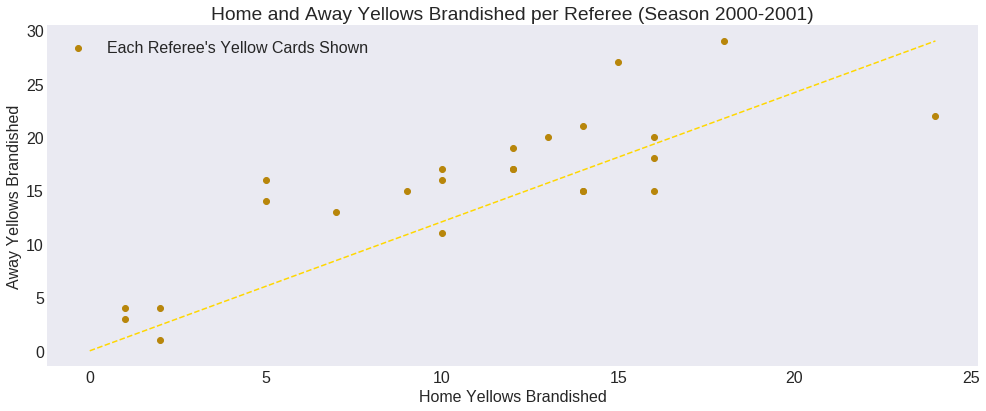

In [224]:
tit = 'Home and Away Yellows Brandished per Referee (Season 2000-2001)'
dlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2000.HY,refs2000.AY,tit,'Home Yellows Brandished','Away Yellows Brandished',dlabel,'yellow')

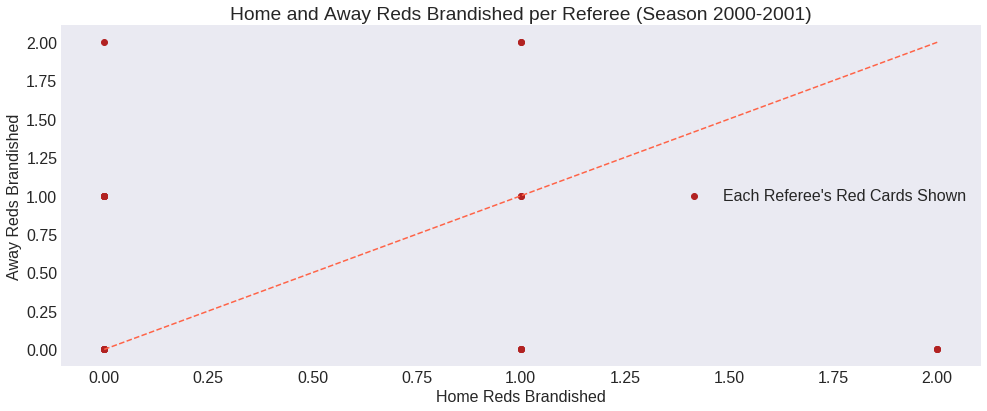

In [228]:
tit = 'Home and Away Reds Brandished per Referee (Season 2000-2001)'
dlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2000.HR,refs2000.AR,tit,'Home Reds Brandished','Away Reds Brandished',dlabel,'red')

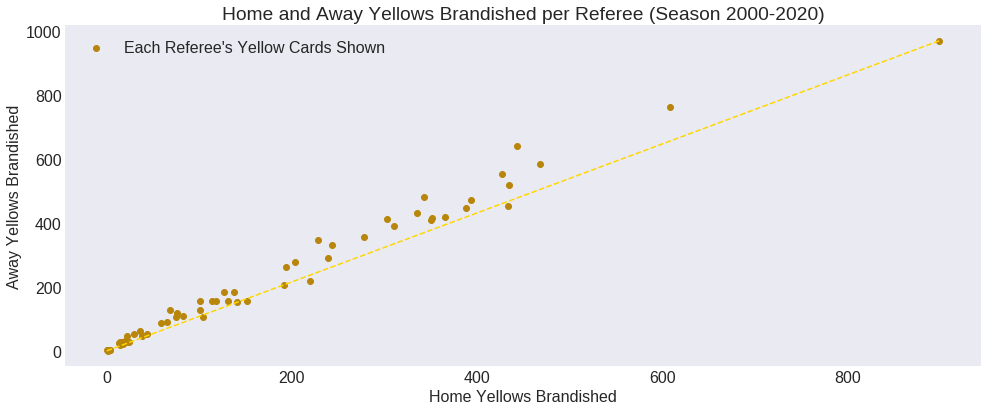

In [229]:
tit = 'Home and Away Yellows Brandished per Referee (Season 2000-2020)'
dlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(totrefs.HY,totrefs.AY,tit,'Home Yellows Brandished','Away Yellows Brandished',dlabel,'yellow')

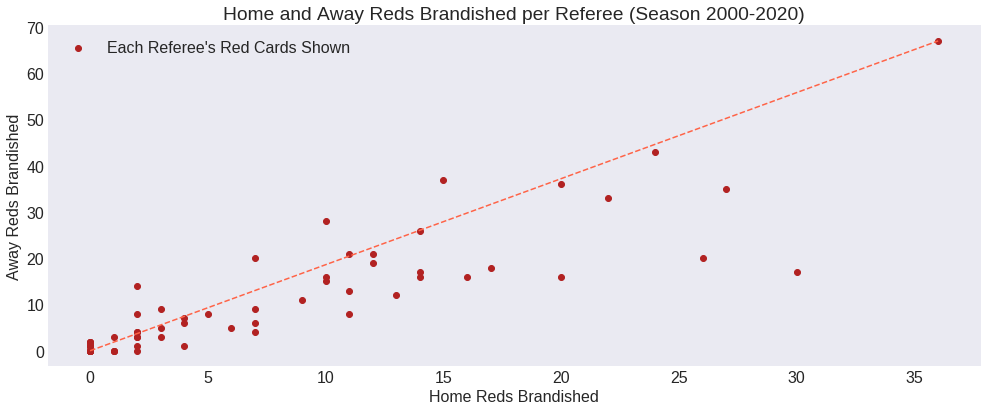

In [230]:
tit = 'Home and Away Reds Brandished per Referee (Season 2000-2020)'
dlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(totrefs.HR,totrefs.AR,tit,'Home Reds Brandished','Away Reds Brandished',dlabel,'red')

In [231]:
def BarGraphGrouped(labels,title,xlabel,ylabel,group1,group1_label,group2,group2_label,card_color=None):

    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    
    save_title = title.replace(' ','_')
    
    barlabels = [x for x in labels]
    bar1 = [y for y in group1]
    bar2 = [z for z in group2]
    width_ = 0.4
    
    if card_color == 'Yellow' or card_color == 'yellow':
        color1, color2, edge = ('palegoldenrod','goldenrod','darkgoldenrod')
    elif card_color == 'Red' or card_color == 'red':
        color1, color2, edge = ('lightcoral','firebrick','maroon')
    else:
        color1, color2, edge = ((rd.random(),rd.random(),rd.random()),(rd.random(),rd.random(),rd.random()),None)
        
    r1 = np.arange(len(bar1))
    r2 = [x+width_ for x in r1]
    ax.bar(r1,bar1,color=color1,width=width_,edgecolor=edge,label=group1_label)
    ax.bar(r2,bar2,color=color2,width=width_,label=group2_label)

    ax.set_xticks(r1)
    ax.set_xticklabels(barlabels,rotation=45,fontdict={'fontsize':9})
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig(f'/home/josh/Documents/dsi/caps/cap1/images/{save_title}.jpeg',dpi=100)
    plt.show()

In [234]:
working_df.ref_name.value_counts()

Mike Dean          508
Martin Atkinson    409
Andre Marriner     332
Phil Dowd          306
Howard Webb        297
                  ... 
Andy Hall            1
Tim Robinson         1
Robert Jones         1
Neil Yates           1
Oliver Langford      1
Name: ref_name, Length: 63, dtype: int64

In [236]:
avg_games_reffed = working_df.ref_name.value_counts().mean()
avg_games_reffedAnd, as in all sports, referees play the most crucial role of 

120.19047619047619

In [250]:
totrefs[totrefs.ref_name == 'Howard Webb']

,ref_name,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Games_reffed
20,Howard Webb,442.0,311.0,189.0,133.0,3922.0,3137.0,2042.0,1623.0,1826.0,1422.0,3510.0,3597.0,427.0,555.0,12.0,21.0,297


In [251]:
sorted_totrefs = totrefs.sort_values('Games_reffed',ascending=False)

In [252]:
top_refs = sorted_totrefs[sorted_totrefs['Games_reffed'] >= avg_games_reffed]

In [253]:
top_refs.head()

,ref_name,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Games_reffed
33,Mike Dean,785.0,592.0,353.0,257.0,7062.0,5403.0,3253.0,2464.0,3160.0,2424.0,5750.0,5810.0,899.0,971.0,36.0,67.0,508
30,Martin Atkinson,598.0,428.0,261.0,186.0,5697.0,4285.0,2465.0,1838.0,2462.0,1952.0,4429.0,4840.0,608.0,764.0,27.0,35.0,409
1,Andre Marriner,525.0,428.0,241.0,197.0,4635.0,3710.0,2034.0,1642.0,1978.0,1599.0,3477.0,3539.0,468.0,584.0,20.0,36.0,332
47,Phil Dowd,503.0,356.0,219.0,142.0,4145.0,3226.0,2140.0,1647.0,1960.0,1541.0,3731.0,4066.0,443.0,643.0,24.0,43.0,306
20,Howard Webb,442.0,311.0,189.0,133.0,3922.0,3137.0,2042.0,1623.0,1826.0,1422.0,3510.0,3597.0,427.0,555.0,12.0,21.0,297


In [254]:
top_refs.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Games_reffed
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,380.000000,285.708333,169.875000,124.708333,3389.666667,2669.333333,1576.875000,1229.000000,1518.375000,1195.416667,2822.458333,2946.166667,358.041667,443.750000,16.416667,23.541667,249.291667
std,133.828898,100.201310,60.385942,44.346932,1205.574792,938.634284,563.760534,436.459969,533.005001,425.666732,969.071406,995.911846,157.242952,173.972824,7.689160,13.147918,85.325708
min,192.000000,135.000000,88.000000,55.000000,1578.000000,1229.000000,720.000000,581.000000,731.000000,576.000000,1337.000000,1425.000000,137.000000,184.000000,7.000000,4.000000,127.000000
25%,297.750000,212.500000,134.000000,90.500000,2665.500000,1999.750000,1299.750000,965.250000,1249.250000,911.000000,2281.250000,2474.000000,242.000000,343.500000,10.750000,16.000000,197.500000
50%,364.000000,287.000000,163.000000,127.500000,3245.500000,2534.000000,1447.500000,1219.500000,1490.000000,1199.000000,2847.500000,2960.500000,346.500000,418.500000,14.000000,19.500000,248.000000
75%,439.000000,320.500000,196.250000,141.250000,3800.000000,3108.500000,1827.750000,1485.250000,1700.000000,1400.250000,3271.750000,3338.500000,428.500000,491.000000,20.500000,29.250000,280.250000
max,785.000000,592.000000,353.000000,257.000000,7062.000000,5403.000000,3253.000000,2464.000000,3160.000000,2424.000000,5750.000000,5810.000000,899.000000,971.000000,36.000000,67.000000,508.000000


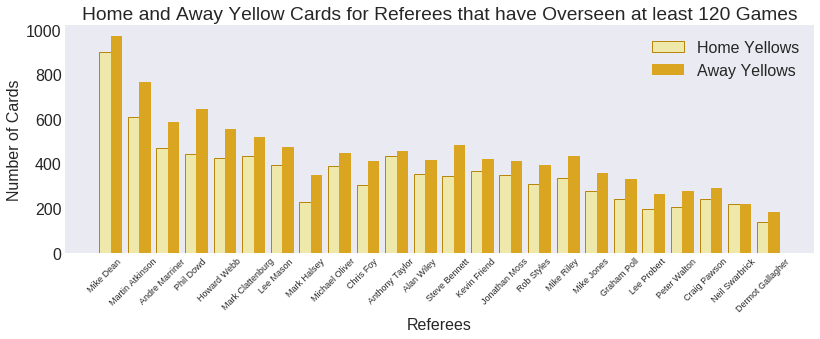

In [256]:
tit = 'Home and Away Yellow Cards for Referees that have Overseen at least 120 Games'
BarGraphGrouped(top_refs.ref_name,tit,'Referees','Number of Cards',top_refs.HY,'Home Yellows',top_refs.AY,'Away Yellows','yellow')

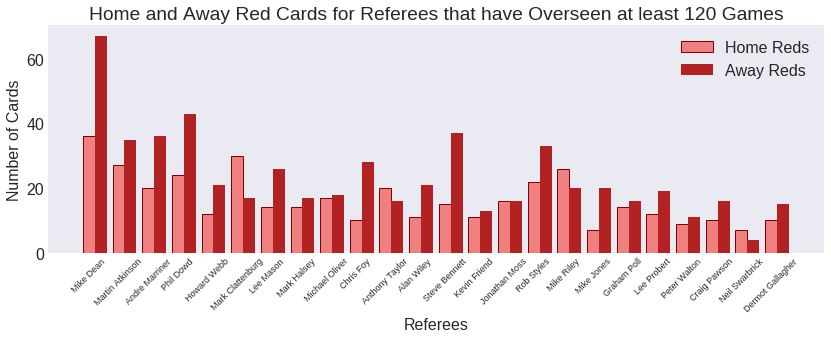

In [257]:
tit = 'Home and Away Red Cards for Referees that have Overseen at least 120 Games'
BarGraphGrouped(top_refs.ref_name,tit,'Referees','Number of Cards',top_refs.HR,'Home Reds',top_refs.AR,'Away Reds','red')

In [258]:
df2001 = create_df('./2001/df_2001.csv')
refs2001 = create_ref_df(df2001)

In [259]:
refs2001

,ref_name,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Games_reffed
0,Alan Wiley,25.0,42.0,7.0,21.0,303.0,264.0,118.0,119.0,172.0,99.0,361.0,371.0,40.0,37.0,3.0,0.0,25
1,Andy D'Urso,46.0,25.0,21.0,12.0,344.0,210.0,165.0,105.0,167.0,89.0,299.0,303.0,38.0,47.0,5.0,5.0,22
2,Barry Knight,13.0,6.0,5.0,4.0,122.0,111.0,57.0,50.0,62.0,50.0,157.0,175.0,20.0,29.0,3.0,3.0,11
3,Chris Foy,0.0,0.0,0.0,0.0,13.0,6.0,6.0,4.0,7.0,4.0,13.0,13.0,1.0,2.0,0.0,0.0,1
4,Clive Wilkes,15.0,7.0,6.0,3.0,186.0,119.0,89.0,59.0,101.0,54.0,197.0,207.0,20.0,26.0,1.0,2.0,14
5,David Elleray,19.0,20.0,9.0,7.0,219.0,173.0,104.0,78.0,119.0,68.0,238.0,261.0,20.0,34.0,3.0,3.0,18
6,David Pugh,4.0,2.0,3.0,1.0,71.0,39.0,26.0,19.0,35.0,17.0,63.0,95.0,6.0,10.0,0.0,0.0,6
7,Dermot Gallagher,26.0,16.0,12.0,6.0,232.0,178.0,108.0,71.0,96.0,68.0,193.0,207.0,16.0,27.0,0.0,1.0,17
8,Eddie Wolstenholme,11.0,6.0,6.0,2.0,82.0,38.0,49.0,17.0,51.0,20.0,79.0,94.0,6.0,19.0,1.0,1.0,6
9,Graham Barber,19.0,43.0,8.0,18.0,242.0,256.0,114.0,136.0,129.0,114.0,346.0,372.0,42.0,61.0,3.0,2.0,23


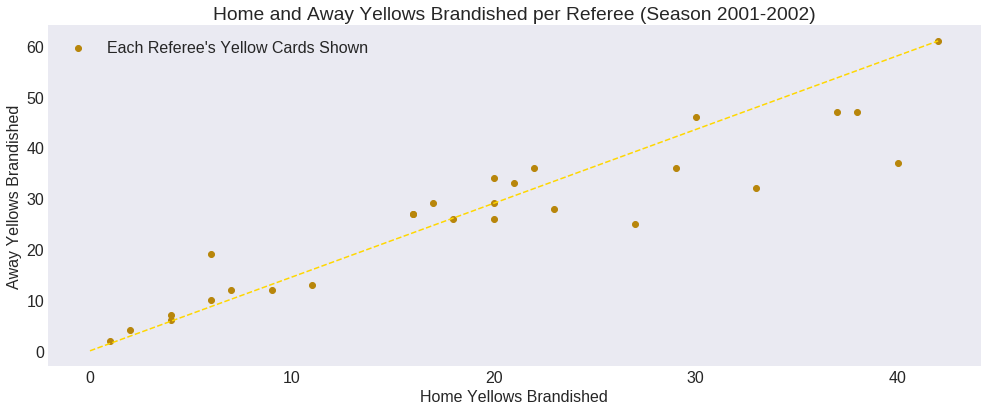

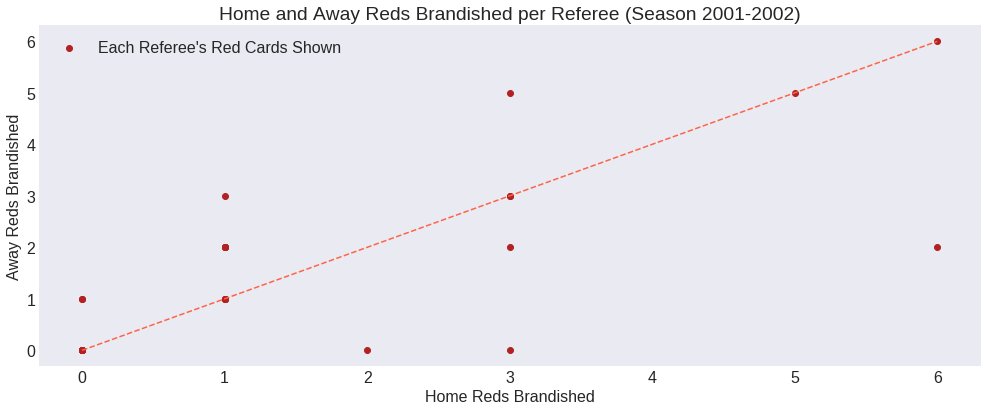

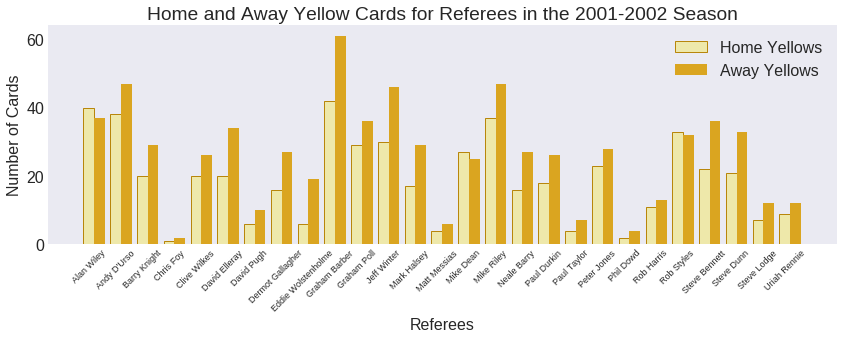

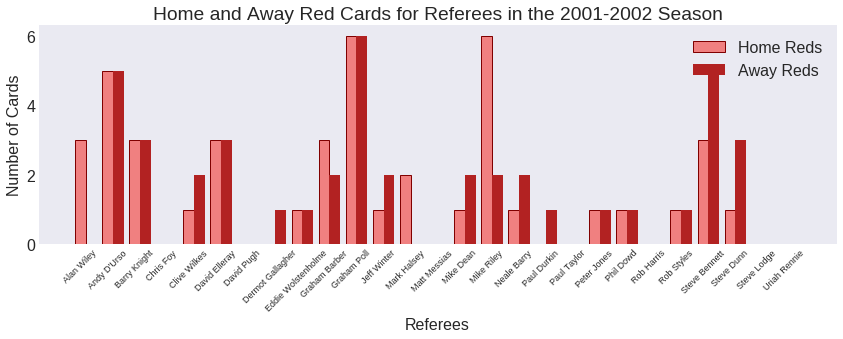

In [260]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2001-2002)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2001.HY,refs2001.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2001-2002)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2001.HR,refs2001.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2001-2002 Season'
BarGraphGrouped(refs2001.ref_name,ybartit,'Referees','Number of Cards',refs2001.HY,'Home Yellows',refs2001.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2001-2002 Season'
BarGraphGrouped(refs2001.ref_name,rbartit,'Referees','Number of Cards',refs2001.HR,'Home Reds',refs2001.AR,'Away Reds','red')

In [261]:
df2002 = create_df('./2002/df_2002.csv')
refs2002 = create_ref_df(df2002)

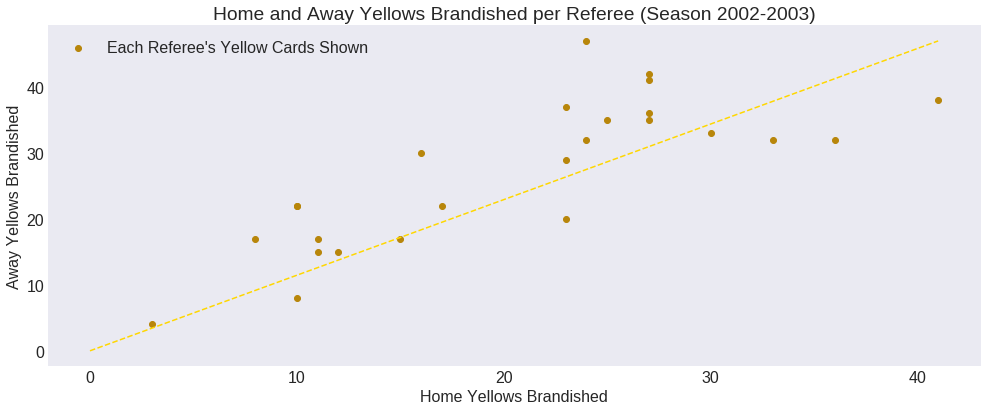

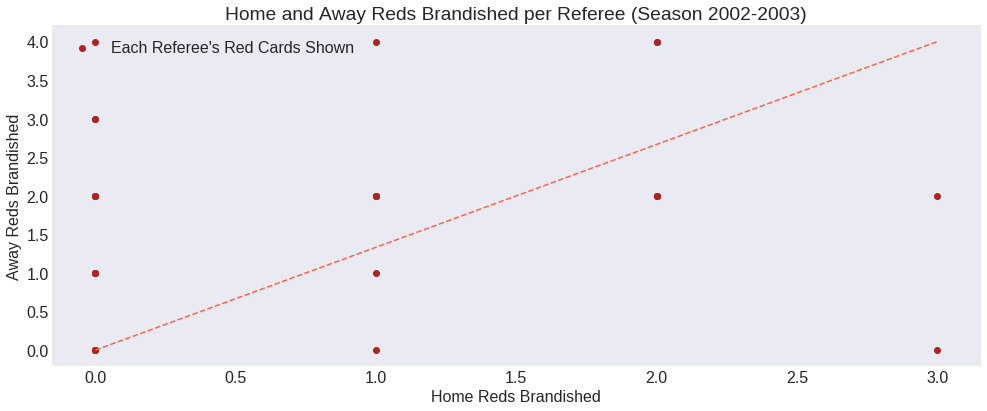

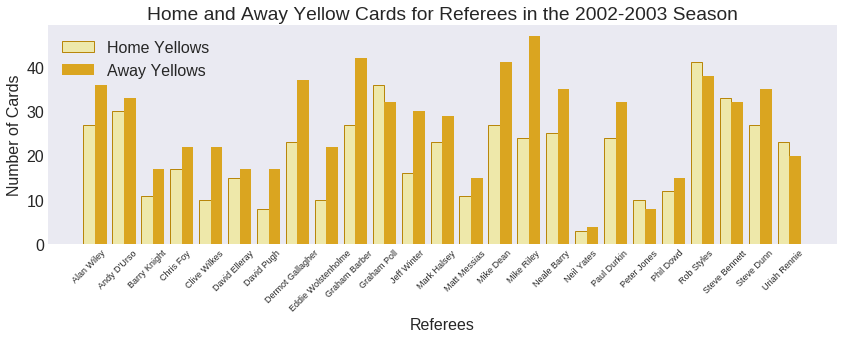

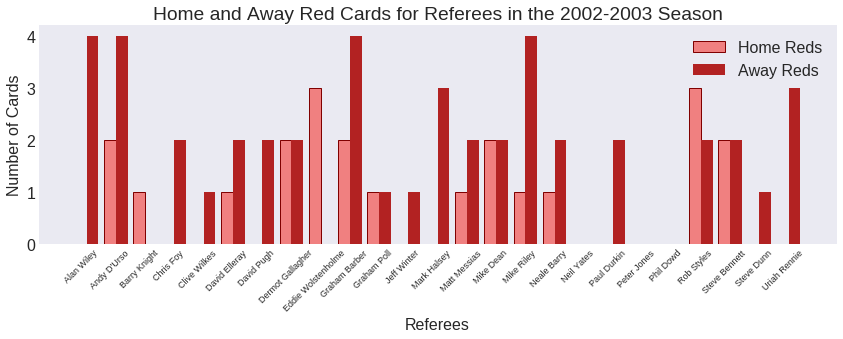

In [262]:
yscattit = 'Home and Away Yellows Brandished per Referee (Season 2002-2003)'
yscatdlabel = 'Each Referee\'s Yellow Cards Shown'
ScatterPlot(refs2002.HY,refs2002.AY,yscattit,'Home Yellows Brandished','Away Yellows Brandished',yscatdlabel,'yellow')
rscattit = 'Home and Away Reds Brandished per Referee (Season 2002-2003)'
rscatdlabel = 'Each Referee\'s Red Cards Shown'
ScatterPlot(refs2002.HR,refs2002.AR,rscattit,'Home Reds Brandished','Away Reds Brandished',rscatdlabel,'red')
ybartit = 'Home and Away Yellow Cards for Referees in the 2002-2003 Season'
BarGraphGrouped(refs2002.ref_name,ybartit,'Referees','Number of Cards',refs2002.HY,'Home Yellows',refs2002.AY,'Away Yellows','yellow')
rbartit = 'Home and Away Red Cards for Referees in the 2002-2003 Season'
BarGraphGrouped(refs2002.ref_name,rbartit,'Referees','Number of Cards',refs2002.HR,'Home Reds',refs2002.AR,'Away Reds','red')

In [263]:
df2003 = create_df('./2003/df_2003.csv')
refs2003 = create_ref_df(df2003)

In [264]:
df2004 = create_df('./2004/df_2004.csv')
refs2004 = create_ref_df(df2004)

In [265]:
df2005 = create_df('./2005/df_2005.csv')
refs2005 = create_ref_df(df2005)

In [266]:
df2006 = create_df('./2006/df_2006.csv')
refs2006 = create_ref_df(df2006)

In [267]:
df2007 = create_df('./2007/df_2007.csv')
refs2007 = create_ref_df(df2007)

In [268]:
df2008 = create_df('./2008/df_2008.csv')
refs2008 = create_ref_df(df2008)

In [269]:
df2009 = create_df('./2009/df_2009.csv')
refs2009 = create_ref_df(df2009)

In [270]:
df2010 = create_df('./2010/df_2010.csv')
refs2010 = create_ref_df(df2010)

In [271]:
df2011 = create_df('./2011/df_2011.csv')
refs2011 = create_ref_df(df2011)

In [278]:
df2012 = create_df('./2012/df_2012.csv')
refs2012 = create_ref_df(df2012)

In [279]:
df2013 = create_df('./2013/df_2013.csv')
refs2013 = create_ref_df(df2013)

In [280]:
df2014 = create_df('./2014/df_2014.csv')
refs2014 = create_ref_df(df2014)

In [281]:
df2015 = create_df('./2015/df_2015.csv')
refs2015 = create_ref_df(df2015)

In [277]:
df2016 = create_df('./2016/df_2016.csv')
refs2016 = create_ref_df(df2016)

In [276]:
df2017 = create_df('./2017/df_2017.csv')
refs2017 = create_ref_df(df2017)

In [275]:
df2018 = create_df('./2018/df_2018.csv')
refs2018 = create_ref_df(df2018)

In [273]:
df2019 = create_df('./2019/df_2019.csv')
refs2019 = create_ref_df(df2019)

In [272]:
df2020 = create_df('./2020/df_2020.csv')
refs2020 = create_ref_df(df2020)

In [290]:
totrefs.columns

Index(['ref_name', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST',
       'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'Games_reffed'],
      dtype='object')

In [ ]:
all_yellows = pd.concatenate(refs

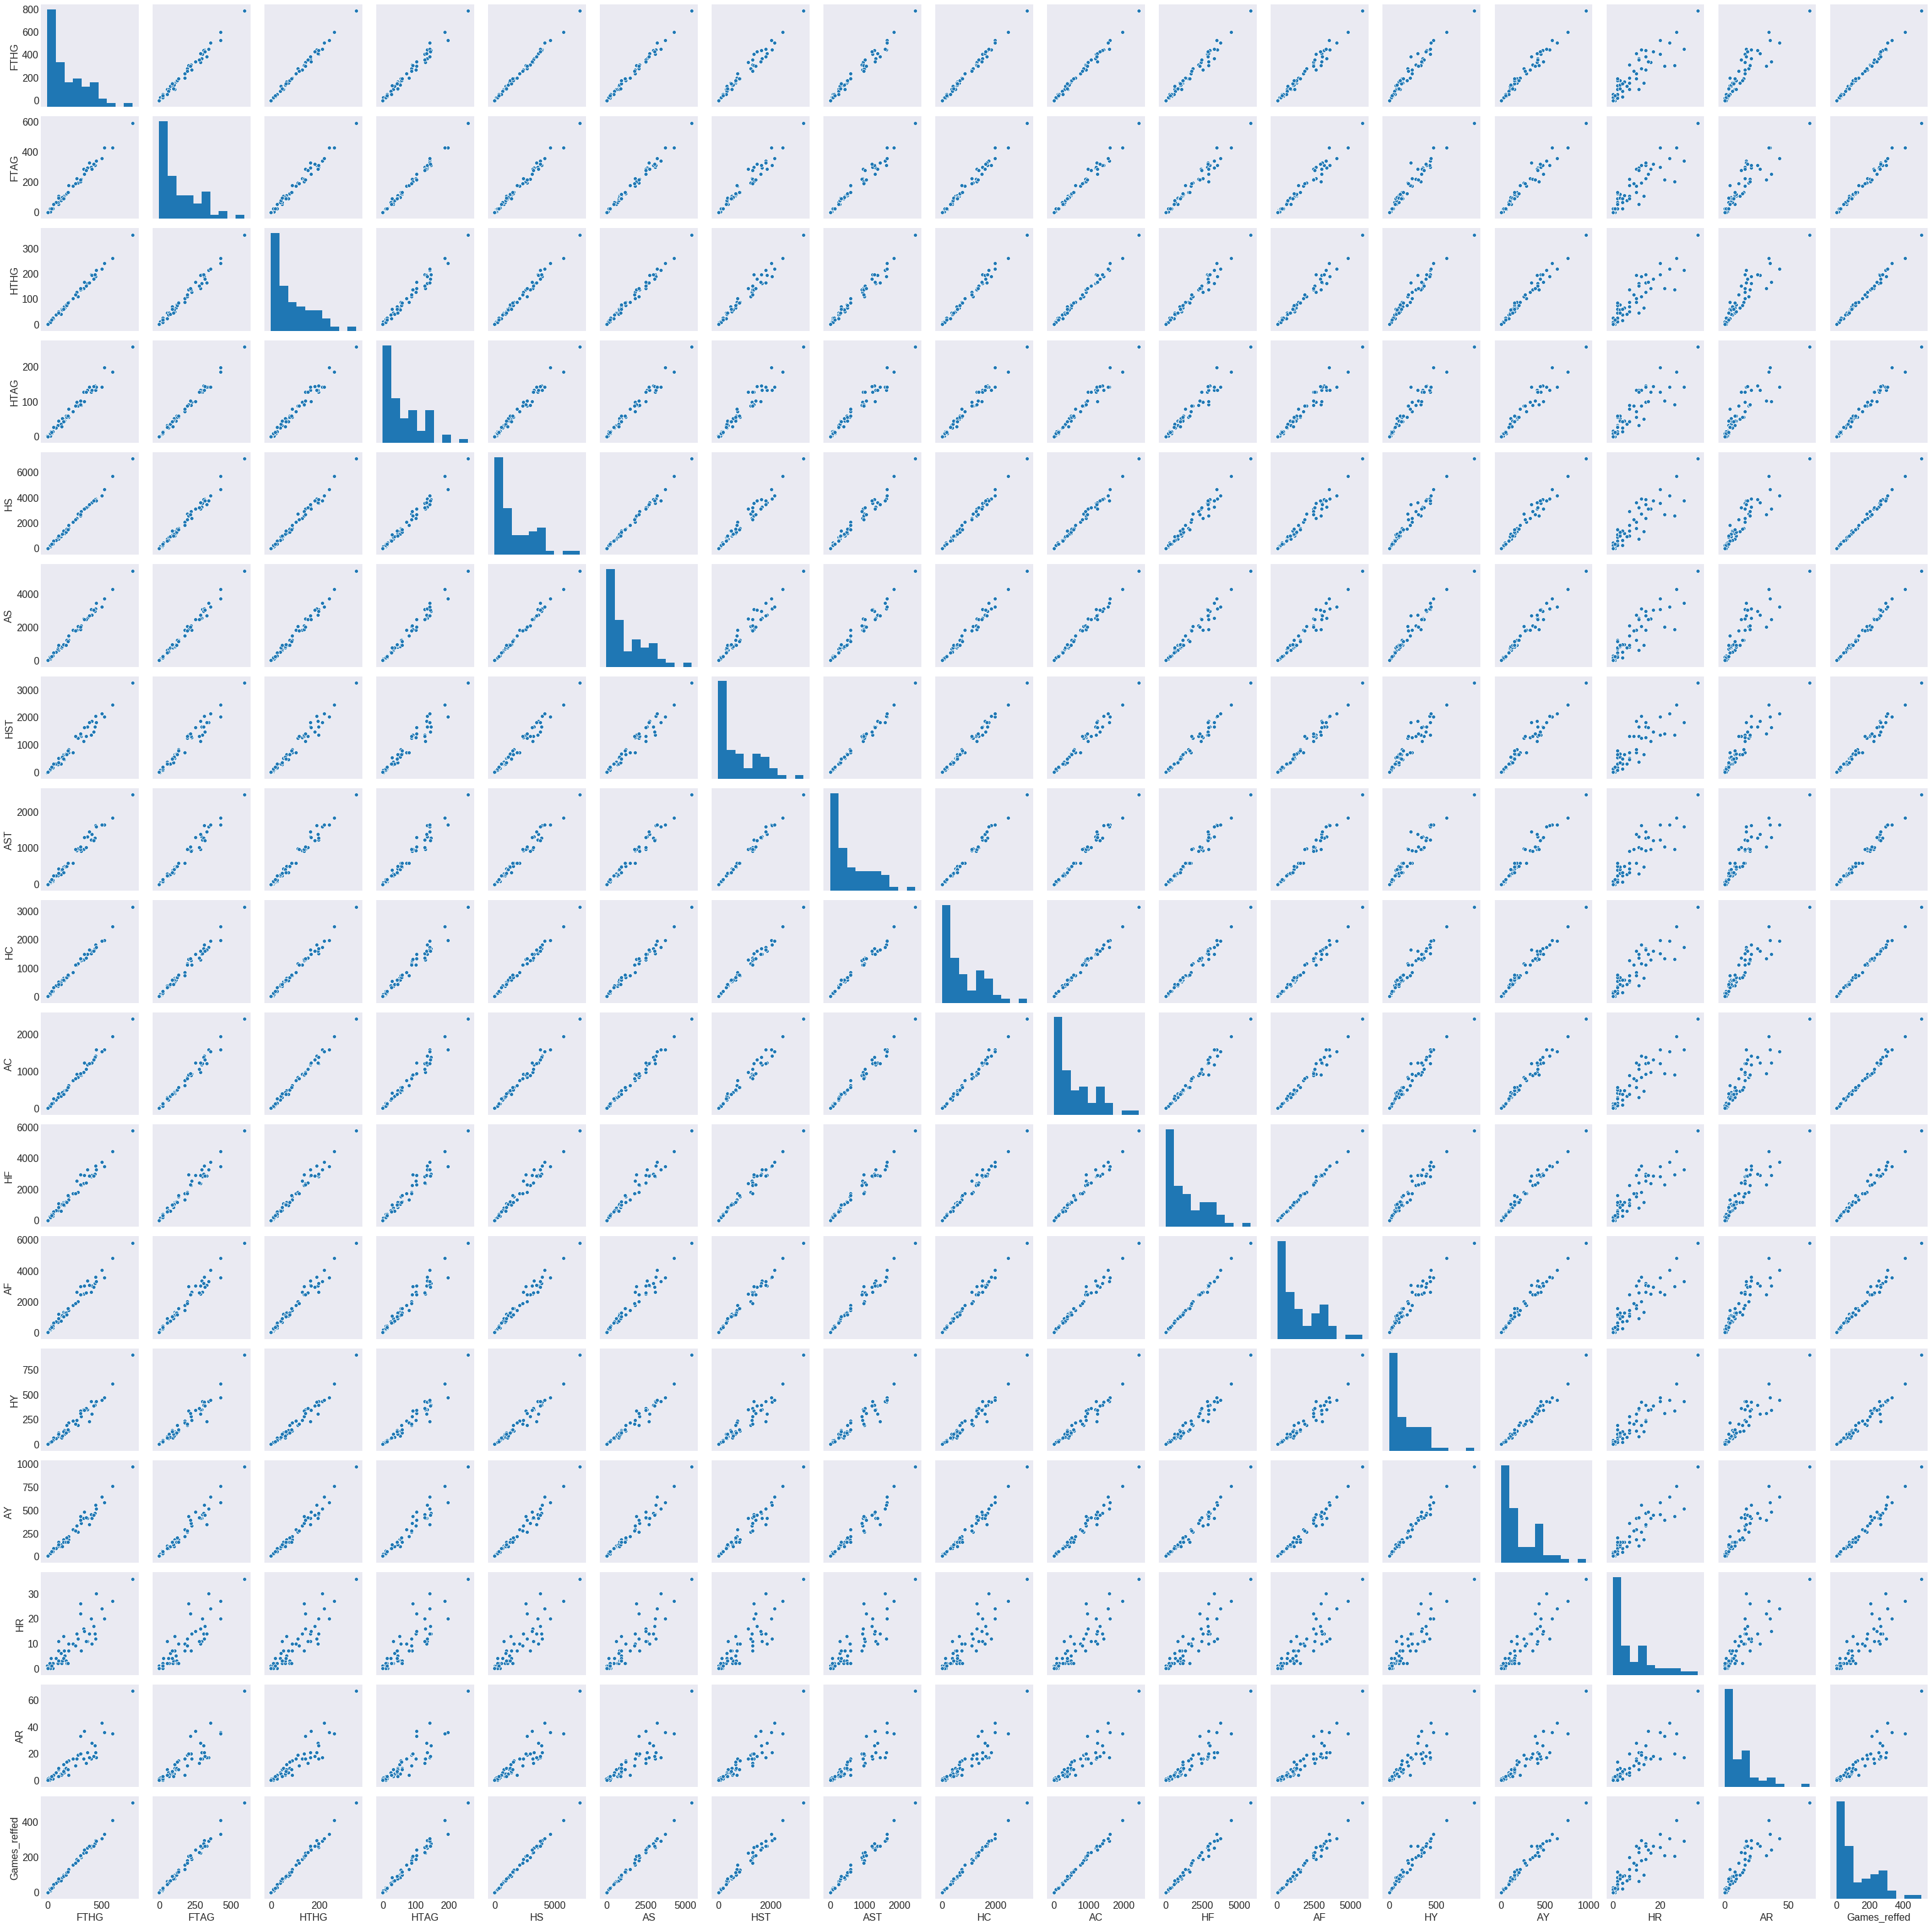

In [289]:
sns.pairplot(totrefs)

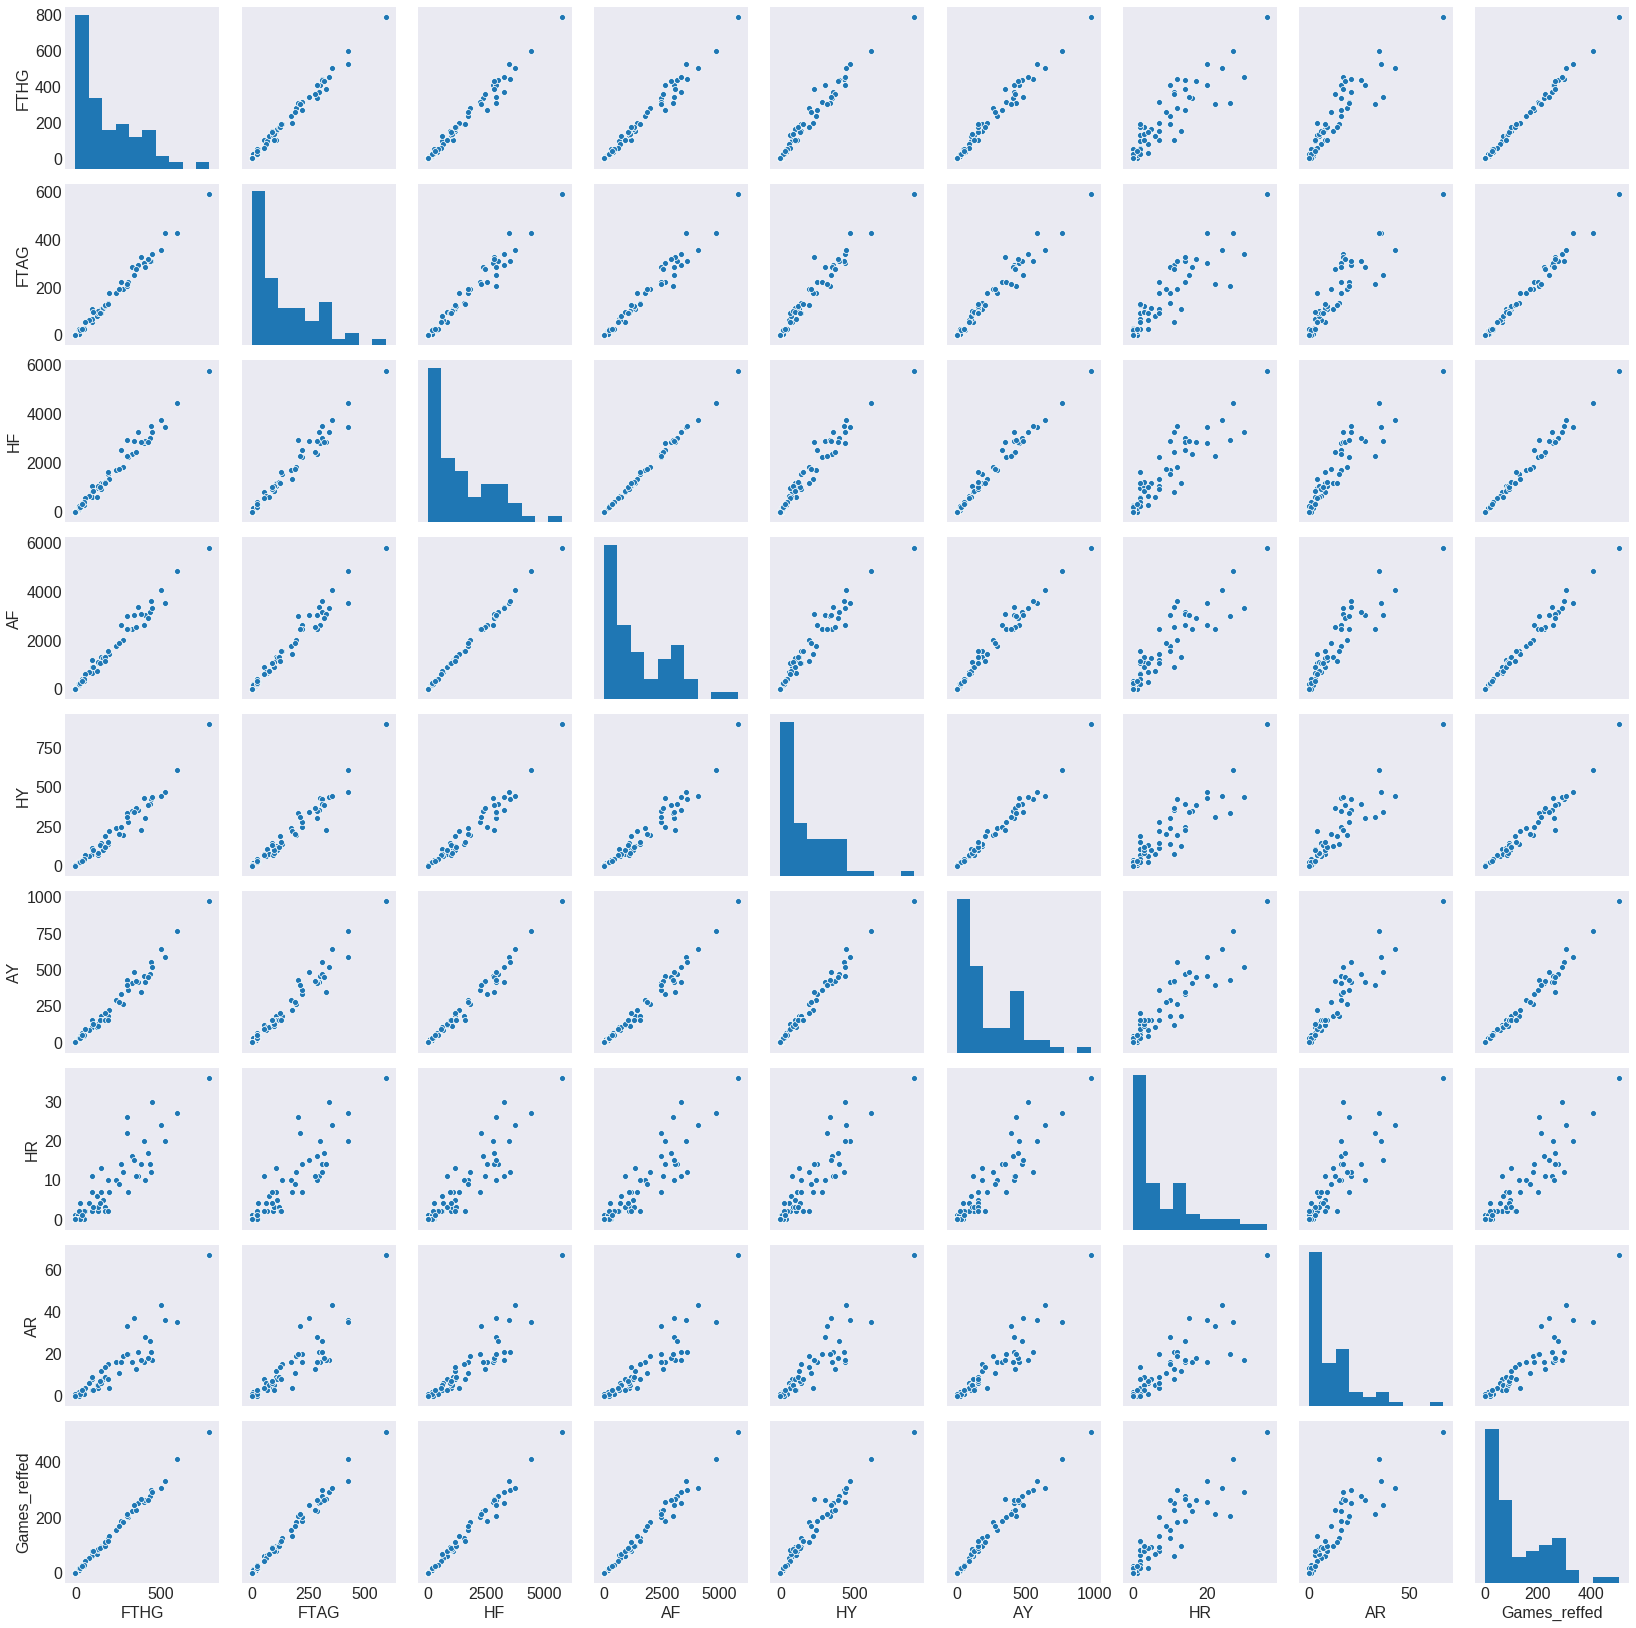

In [293]:
sns.pairplot(totrefs.iloc[:,[1,2,11,12,13,14,15,16,17]])

In [294]:
totrefs.Games_reffed.corr(totrefs.HY)

0.9802819391249364

In [297]:
totrefs.Games_reffed.corr(totrefs.AY)

0.9904798797398615

<Figure size 1440x576 with 0 Axes>

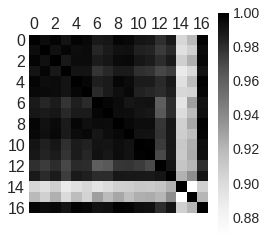

In [296]:
fig = plt.figure(figsize=(20,8))
plt.matshow(totrefs.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

In [298]:
working_df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY',
       'HR', 'AR', 'ref_name'],
      dtype='object')

In [305]:
HmTeam_df = working_df.groupby(['HomeTeam','AwayTeam']).sum()

In [306]:
HmTeam_df.head()

FTHG  FTAG  HTHG  HTAG     HS     AS    HST   AST  \
HomeTeam AwayTeam                                                         
Arsenal  Aston Villa  41.0  16.0  11.0   8.0  295.0  127.0  166.0  65.0   
         Birmingham   12.0   3.0   7.0   2.0   99.0   25.0   59.0  15.0   
         Blackburn    36.0  10.0  15.0   6.0  188.0   76.0  119.0  41.0   
         Blackpool     6.0   0.0   3.0   0.0   26.0    3.0   16.0   1.0   
         Bolton       24.0  10.0   7.0   6.0  193.0   62.0  114.0  34.0   

                         HC    AC     HF     AF    HY    AY   HR   AR  
HomeTeam AwayTeam                                                      
Arsenal  Aston Villa  147.0  78.0  186.0  259.0  28.0  47.0  2.0  1.0  
         Birmingham    54.0  20.0   71.0   94.0   4.0  11.0  1.0  2.0  
         Blackburn     91.0  49.0  120.0  148.0  15.0  28.0  0.0  3.0  
         Blackpool      8.0   2.0    9.0    3.0   0.0   0.0  0.0  1.0  
         Bolton        81.0  35.0  128.0  156.0  14.0  26.0  0.0  5.0

In [307]:
NorthLondArs = HmTeam_df

KeyError: 'Arsenal'